In [1]:
import pandas as pd
import numpy as np 
import csv
df = pd.read_csv("istanbulsatilik.csv", encoding="utf-8-sig")
df.head()

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Brüt / Net M2,Banyo Sayısı,Kat,Kat Sayısı,Bina Yaşı,Isınma Tipi,Eşya Durumu,Yapı Tipi,Yapının Durumu,Krediye Uygunlu...,Yakıt Tipi,Cephe,Link
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6.250.000 TL,İstanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,110 m2 / 100 m2,2,3. Kat,5 Katlı,Sıfır Bina,Kombi,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-zeytinburn...
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4.400.000 TL,İstanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,100 m2 / 90 m2,1,1. Kat,4 Katlı,5 Yaşında,Kombi,Eşyalı Değil,-,-,Uygun,-,-,https://www.hepsiemlak.com/istanbul-zeytinburn...
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2.699.999 TL,İstanbul,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,2 + 1,115 m2 / 105 m2,1,2. Kat,4 Katlı,Sıfır Bina,Kombi,Eşyalı Değil,Betonarme,Sıfır,Uygun,Doğalgaz,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5.570.000 TL,İstanbul,Beylikdüzü,Adnan Kahveci Mah.,Daire,3 + 1,185 m2 / 160 m2,2,8. Kat,13 Katlı,5 Yaşında,Kombi,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5.044.000 TL,İstanbul,Beylikdüzü,Barış Mah.,Daire,3 + 1,165 m2 / 150 m2,2,3. Kat,8 Katlı,5 Yaşında,Kombi,Eşyalı Değil,-,-,Uygun değil,-,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...


In [2]:
df.shape

(28150, 20)

In [5]:
for col in df.columns:
    if df[col].dtype == "object":  # sadece metinsel sütunları kontrol et
        count = df[col].astype(str).str.strip().eq("-").sum()
        if count > 0:
            print(f"{col}: {count} tane '-' içeriyor")

Fiyat: 228 tane '-' içeriyor
Şehir: 228 tane '-' içeriyor
İlçe: 228 tane '-' içeriyor
Mahalle: 228 tane '-' içeriyor
Konut Tipi: 228 tane '-' içeriyor
Oda Sayısı: 228 tane '-' içeriyor
Brüt / Net M2: 228 tane '-' içeriyor
Banyo Sayısı: 455 tane '-' içeriyor
Kat: 1867 tane '-' içeriyor
Kat Sayısı: 231 tane '-' içeriyor
Bina Yaşı: 229 tane '-' içeriyor
Isınma Tipi: 230 tane '-' içeriyor
Eşya Durumu: 2086 tane '-' içeriyor
Yapı Tipi: 11547 tane '-' içeriyor
Yapının Durumu: 10556 tane '-' içeriyor
Krediye Uygunlu...: 25892 tane '-' içeriyor
Yakıt Tipi: 10394 tane '-' içeriyor
Cephe: 6117 tane '-' içeriyor


In [7]:
df[df["Brüt / Net M2"] == "-"].shape[0]

228

In [9]:
# CAPTCHA hatasıyla gelen bozuk ilanları temizle
df = df[df["Brüt / Net M2"] != "-"].reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Başlık              27922 non-null  object
 1   Fiyat               27922 non-null  object
 2   Şehir               27922 non-null  object
 3   İlçe                27922 non-null  object
 4   Mahalle             27922 non-null  object
 5   Konut Tipi          27922 non-null  object
 6   Oda Sayısı          27922 non-null  object
 7   Brüt / Net M2       27922 non-null  object
 8   Banyo Sayısı        27922 non-null  object
 9   Kat                 27922 non-null  object
 10  Kat Sayısı          27922 non-null  object
 11  Bina Yaşı           27922 non-null  object
 12  Isınma Tipi         27922 non-null  object
 13  Eşya Durumu         27922 non-null  object
 14  Yapı Tipi           27922 non-null  object
 15  Yapının Durumu      27922 non-null  object
 16  Krediye Uygunlu...  27

In [13]:
# Geçersiz verileri çıkar
df = df[~df["Brüt / Net M2"].str.contains("Belirtilmemiş", na=False)].reset_index(drop=True)

# Brüt / Net M2 sütunundaki "m2" birimini silmeden önce sayıları çek
# Noktayı sadece binlik ayraçlarda kullanılıyorsa kaldır:
df["Brüt / Net M2"] = df["Brüt / Net M2"].str.replace(" m2", "", regex=False)
df["Brüt / Net M2"] = df["Brüt / Net M2"].str.replace(".", "", regex=False)

# Ayır ve dönüştür
df[['Brüt m2', 'Net m2']] = df['Brüt / Net M2'].str.extract(r'(\d+)\s*/\s*(\d+)')
df['Brüt m2'] = pd.to_numeric(df['Brüt m2'], errors='coerce')
df['Net m2'] = pd.to_numeric(df['Net m2'], errors='coerce')

# Orijinal sütunu kaldır
df.drop(columns=["Brüt / Net M2"], inplace=True)




In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27922 entries, 0 to 27921
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Başlık              27922 non-null  object
 1   Fiyat               27922 non-null  object
 2   Şehir               27922 non-null  object
 3   İlçe                27922 non-null  object
 4   Mahalle             27922 non-null  object
 5   Konut Tipi          27922 non-null  object
 6   Oda Sayısı          27922 non-null  object
 7   Banyo Sayısı        27922 non-null  object
 8   Kat                 27922 non-null  object
 9   Kat Sayısı          27922 non-null  object
 10  Bina Yaşı           27922 non-null  object
 11  Isınma Tipi         27922 non-null  object
 12  Eşya Durumu         27922 non-null  object
 13  Yapı Tipi           27922 non-null  object
 14  Yapının Durumu      27922 non-null  object
 15  Krediye Uygunlu...  27922 non-null  object
 16  Yakıt Tipi          27

In [17]:
# 'Fiyat' sütununu sayıya çevir (örnek: "12.000 TL" → 12000)
df['Fiyat'] = df['Fiyat'].str.replace(".", "", regex=False)  # binlik ayraçları sil
df['Fiyat'] = df['Fiyat'].str.replace(" TL", "", regex=False)  # " TL" sil
df['Fiyat'] = pd.to_numeric(df['Fiyat'], errors='coerce')  # sayıya çevir

# Kontrol edelim
df[['Fiyat']].head(3)


,Fiyat
0,6250000
1,4400000
2,2699999


In [19]:
df.shape

(27922, 21)

In [21]:
df = df[df['Fiyat'] >= 1000000].reset_index(drop=True)

In [23]:
df.shape

(27826, 21)

In [25]:
import unicodedata

def normalize_city(text):
    if not isinstance(text, str):
        return ""
    text = unicodedata.normalize("NFKD", text)
    text = "".join([c for c in text if not unicodedata.combining(c)])
    return text.strip().lower()

# Şehir sütununu doğrudan normalize et
df["Şehir"] = df["Şehir"].astype(str).apply(normalize_city)

# İstanbul dışındaki verileri çıkar
df = df[df["Şehir"] == "istanbul"].reset_index(drop=True)





In [27]:
print(df["Şehir"].unique())
print(df.shape)


['istanbul']
(27826, 21)


In [29]:
import pandas as pd
display(df.head(5))

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Isınma Tipi,Eşya Durumu,Yapı Tipi,Yapının Durumu,Krediye Uygunlu...,Yakıt Tipi,Cephe,Link,Brüt m2,Net m2
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,2,3. Kat,5 Katlı,...,Kombi,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-zeytinburn...,110,100
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,1,1. Kat,4 Katlı,...,Kombi,Eşyalı Değil,-,-,Uygun,-,-,https://www.hepsiemlak.com/istanbul-zeytinburn...,100,90
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,istanbul,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,2 + 1,1,2. Kat,4 Katlı,...,Kombi,Eşyalı Değil,Betonarme,Sıfır,Uygun,Doğalgaz,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,115,105
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,istanbul,Beylikdüzü,Adnan Kahveci Mah.,Daire,3 + 1,2,8. Kat,13 Katlı,...,Kombi,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,185,160
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,istanbul,Beylikdüzü,Barış Mah.,Daire,3 + 1,2,3. Kat,8 Katlı,...,Kombi,Eşyalı Değil,-,-,Uygun değil,-,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150


In [31]:
df["Fiyat"].describe()
df["Fiyat"].isna().sum()  # Kaç tanesi dönüştürülememiş?


0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27826 entries, 0 to 27825
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Başlık              27826 non-null  object
 1   Fiyat               27826 non-null  int64 
 2   Şehir               27826 non-null  object
 3   İlçe                27826 non-null  object
 4   Mahalle             27826 non-null  object
 5   Konut Tipi          27826 non-null  object
 6   Oda Sayısı          27826 non-null  object
 7   Banyo Sayısı        27826 non-null  object
 8   Kat                 27826 non-null  object
 9   Kat Sayısı          27826 non-null  object
 10  Bina Yaşı           27826 non-null  object
 11  Isınma Tipi         27826 non-null  object
 12  Eşya Durumu         27826 non-null  object
 13  Yapı Tipi           27826 non-null  object
 14  Yapının Durumu      27826 non-null  object
 15  Krediye Uygunlu...  27826 non-null  object
 16  Yakıt Tipi          27

In [35]:
df.isna().sum()


Başlık                0
Fiyat                 0
Şehir                 0
İlçe                  0
Mahalle               0
Konut Tipi            0
Oda Sayısı            0
Banyo Sayısı          0
Kat                   0
Kat Sayısı            0
Bina Yaşı             0
Isınma Tipi           0
Eşya Durumu           0
Yapı Tipi             0
Yapının Durumu        0
Krediye Uygunlu...    0
Yakıt Tipi            0
Cephe                 0
Link                  0
Brüt m2               0
Net m2                0
dtype: int64

In [37]:
# Aynı linke sahip satır sayısını hesapla
duplicate_links = df[df.duplicated(subset=["Link"], keep=False)]
print(f"Aynı linke sahip toplam {duplicate_links.shape[0]} satır bulundu.")
duplicate_links.sort_values("Link").head()
df = df.drop_duplicates(subset=["Link"], keep="first").reset_index(drop=True)

Aynı linke sahip toplam 6702 satır bulundu.


In [39]:
df.shape

(24242, 21)

In [41]:
print(df.dtypes)

Başlık                object
Fiyat                  int64
Şehir                 object
İlçe                  object
Mahalle               object
Konut Tipi            object
Oda Sayısı            object
Banyo Sayısı          object
Kat                   object
Kat Sayısı            object
Bina Yaşı             object
Isınma Tipi           object
Eşya Durumu           object
Yapı Tipi             object
Yapının Durumu        object
Krediye Uygunlu...    object
Yakıt Tipi            object
Cephe                 object
Link                  object
Brüt m2                int64
Net m2                 int64
dtype: object


In [43]:
print(df['Konut Tipi'].value_counts())


Konut Tipi
Daire           21339
Villa            1191
Residence         831
Müstakil Ev       400
Bina              314
Köşk               56
Yalı Dairesi       36
Yalı               28
Yazlık             21
Çiftlik Evi        15
Prefabrik           5
Bungalov            4
Loft Daire          1
Köy Evi             1
Name: count, dtype: int64


In [45]:
# Az bulunanları "Diğer" olarak birleştir
az_bulunanlar = ['Loft Daire', 'Çiftlik Evi', 'Yazlık', 'Köşk', 'Yalı', 'Yalı Dairesi', 'Bina', 'Müstakil Ev' , 'Köy Evi' , 'Bungalov' , 'Prefabrik']
df['Konut Tipi'] = df['Konut Tipi'].apply(lambda x: 'Diğer' if x in az_bulunanlar else x)


In [47]:
print(df['Konut Tipi'].value_counts())


Konut Tipi
Daire        21339
Villa         1191
Diğer          881
Residence      831
Name: count, dtype: int64


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Konut Tipi Encoded'] = le.fit_transform(df['Konut Tipi'])

# Kategori eşleştirmelerini göstermek için
categories_mapping = dict(enumerate(le.classes_))
print("Kategori eşleştirmeleri:", categories_mapping)


Kategori eşleştirmeleri: {0: 'Daire', 1: 'Diğer', 2: 'Residence', 3: 'Villa'}


In [50]:
print(df.dtypes)

Başlık                object
Fiyat                  int64
Şehir                 object
İlçe                  object
Mahalle               object
Konut Tipi            object
Oda Sayısı            object
Banyo Sayısı          object
Kat                   object
Kat Sayısı            object
Bina Yaşı             object
Isınma Tipi           object
Eşya Durumu           object
Yapı Tipi             object
Yapının Durumu        object
Krediye Uygunlu...    object
Yakıt Tipi            object
Cephe                 object
Link                  object
Brüt m2                int64
Net m2                 int64
Konut Tipi Encoded     int32
dtype: object


In [51]:
print(df['Konut Tipi'].value_counts())

Konut Tipi
Daire        21339
Villa         1191
Diğer          881
Residence      831
Name: count, dtype: int64


In [55]:
Katlar = df['Kat'].value_counts()
print(Katlar)

Kat
3. Kat             2848
1. Kat             2732
2. Kat             2654
4. Kat             2373
Bahçe Katı         2040
Yüksek Giriş       1578
-                  1436
5. Kat             1404
Ara Kat            1071
Giriş Katı          879
6. Kat              692
En Üst Kat          565
7. Kat              529
8. Kat              423
9. Kat              366
21 ve üzeri         316
Kot 1               291
10. Kat             289
Çatı Katı           208
11. Kat             208
12. Kat             170
Zemin               159
13. Kat             144
Kot 2               118
14. Kat              92
Yarı Bodrum          88
16. Kat              81
Bodrum               77
15. Kat              69
Kot 3                58
Teras Katı           52
17. Kat              42
Villa Katı           40
19. Kat              38
Bodrum ve Zemin      37
18. Kat              35
20. Kat              34
Tripleks              5
Asma Kat              1
Name: count, dtype: int64


In [57]:
import numpy as np
import re

# Statik kat isimleri haricindeki özel durumları hariç tut
floor_mapping = {
    '1. Kat': 1, '2. Kat': 2, '3. Kat': 3, '4. Kat': 4, '5. Kat': 5,
    '6. Kat': 6, '7. Kat': 7, '8. Kat': 8, '9. Kat': 9, '10. Kat': 10,
    '11. Kat': 11, '12. Kat': 12, '13. Kat': 13, '14. Kat': 14,
    '15. Kat': 15, '16. Kat': 16, '17. Kat': 17, '18. Kat': 18,
    '19. Kat': 19, '20. Kat': 20, '21 ve üzeri': 21,
    'Ara Kat': 0.5, 'Asma Kat': 0.5,
    'Bahçe Katı': -1, 'Bodrum': -1, 'Bodrum ve Zemin': -1,
    'En Üst Kat': np.nan,  # parse_floor içinde dinamik atanıyor
    'Giriş Katı': 0, 'Zemin': 0,
    'Kot 1': -1, 'Kot 2': -2, 'Kot 3': -3,
    'Teras Katı': 3, 'Tripleks': 2, 'Villa Katı': 1,
    'Yarı Bodrum': -0.5, 'Yüksek Giriş': 0.5,
    '-': np.nan, 'Belirtilmemiş': np.nan
}

# Kat Sayısı'nı sayıya çevir
df["Kat Sayısı"] = df["Kat Sayısı"].str.extract(r"(\d+)").astype(float)

# Kat sütununu sayısal değere dönüştür
def parse_floor(row):
    kat = row['Kat']
    kat_sayisi = row['Kat Sayısı']
    
    if pd.isna(kat):
        return np.nan
    if isinstance(kat, str):
        kat = kat.strip()
        if kat == "En Üst Kat":
            return kat_sayisi  # Dinamik dönüşüm burada
        if kat in floor_mapping:
            return floor_mapping[kat]
        match = re.search(r'(-?\d+(\.\d+)?)', kat)
        if match:
            return float(match.group(0))
    return np.nan

# Uygula
df['Kat'] = df.apply(parse_floor, axis=1)


In [58]:
print(df.dtypes)

Başlık                 object
Fiyat                   int64
Şehir                  object
İlçe                   object
Mahalle                object
Konut Tipi             object
Oda Sayısı             object
Banyo Sayısı           object
Kat                   float64
Kat Sayısı            float64
Bina Yaşı              object
Isınma Tipi            object
Eşya Durumu            object
Yapı Tipi              object
Yapının Durumu         object
Krediye Uygunlu...     object
Yakıt Tipi             object
Cephe                  object
Link                   object
Brüt m2                 int64
Net m2                  int64
Konut Tipi Encoded      int32
dtype: object


In [61]:
Kat_Sayısı_bina = df['Kat Sayısı'].value_counts()
print(Kat_Sayısı_bina)

Kat Sayısı
5.0      5973
4.0      5895
3.0      2886
6.0      1901
7.0      1031
9.0       804
8.0       784
2.0       739
10.0      602
14.0      461
11.0      425
12.0      409
30.0      326
13.0      325
15.0      305
1.0       170
20.0      120
16.0      114
17.0      112
18.0      101
24.0       85
22.0       77
23.0       67
19.0       58
25.0       56
21.0       46
29.0       45
26.0       42
33.0       35
27.0       28
35.0       25
44.0       25
40.0       25
32.0       23
28.0       22
31.0       14
50.0       13
34.0       13
42.0       10
45.0        8
54.0        6
46.0        6
37.0        6
41.0        5
36.0        3
52.0        3
65.0        2
43.0        2
48.0        2
38.0        2
39.0        1
303.0       1
53.0        1
Name: count, dtype: int64


In [63]:
df['Kat Sayısı'].value_counts().sort_index()


Kat Sayısı
1.0       170
2.0       739
3.0      2886
4.0      5895
5.0      5973
6.0      1901
7.0      1031
8.0       784
9.0       804
10.0      602
11.0      425
12.0      409
13.0      325
14.0      461
15.0      305
16.0      114
17.0      112
18.0      101
19.0       58
20.0      120
21.0       46
22.0       77
23.0       67
24.0       85
25.0       56
26.0       42
27.0       28
28.0       22
29.0       45
30.0      326
31.0       14
32.0       23
33.0       35
34.0       13
35.0       25
36.0        3
37.0        6
38.0        2
39.0        1
40.0       25
41.0        5
42.0       10
43.0        2
44.0       25
45.0        8
46.0        6
48.0        2
50.0       13
52.0        3
53.0        1
54.0        6
65.0        2
303.0       1
Name: count, dtype: int64

In [65]:
df['Kat Sayısı'].describe()


count    24240.000000
mean         6.857384
std          6.224574
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max        303.000000
Name: Kat Sayısı, dtype: float64

In [67]:
df = df[df['Kat Sayısı'] <= 60].reset_index(drop=True)


In [69]:
df['Kat Sayısı'].describe()

count    24237.000000
mean         6.840368
std          5.903580
min          1.000000
25%          4.000000
50%          5.000000
75%          7.000000
max         54.000000
Name: Kat Sayısı, dtype: float64

In [71]:
df.shape

(24237, 22)

In [73]:
display(df.head(5))

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Eşya Durumu,Yapı Tipi,Yapının Durumu,Krediye Uygunlu...,Yakıt Tipi,Cephe,Link,Brüt m2,Net m2,Konut Tipi Encoded
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,2,3.0,5.0,...,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-zeytinburn...,110,100,0
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,2 + 1,1,1.0,4.0,...,Eşyalı Değil,-,-,Uygun,-,-,https://www.hepsiemlak.com/istanbul-zeytinburn...,100,90,0
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,istanbul,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,2 + 1,1,2.0,4.0,...,Eşyalı Değil,Betonarme,Sıfır,Uygun,Doğalgaz,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,115,105,0
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,istanbul,Beylikdüzü,Adnan Kahveci Mah.,Daire,3 + 1,2,8.0,13.0,...,Eşyalı Değil,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,185,160,0
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,istanbul,Beylikdüzü,Barış Mah.,Daire,3 + 1,2,3.0,8.0,...,Eşyalı Değil,-,-,Uygun değil,-,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150,0


In [75]:
df['Eşya Durumu'].value_counts().sort_index()

Eşya Durumu
-                1617
Eşyalı           1375
Eşyalı Değil    21245
Name: count, dtype: int64

In [77]:
# "-" olanları "Eşyalı Değil" yap
df['Eşya Durumu'] = df['Eşya Durumu'].replace("-", "Eşyalı Değil")

# Binary encode: Eşyalı → 1, Eşyalı Değil → 0
df['Eşya Durumu'] = df['Eşya Durumu'].map({"Eşyalı": 1, "Eşyalı Değil": 0})


In [79]:
df['Eşya Durumu'].value_counts().sort_index()

Eşya Durumu
0    22862
1     1375
Name: count, dtype: int64

In [81]:
import re

def parse_room_number(x):
    if isinstance(x, str):
        x = x.strip()

        # En yaygın format: "3 + 1"
        match = re.match(r'(\d+)\s*\+\s*(\d+)', x)
        if match:
            return int(match.group(1)) + int(match.group(2))

        # Ondalık format: "1.5 + 1"
        match = re.match(r'(\d+\.\d+)\s*\+\s*(\d+)', x)
        if match:
            return float(match.group(1)) + int(match.group(2))

        # "Stüdyo" gibi özel durum
        if 'stüdyo' in x.lower():
            return 1

        # "3 Oda" gibi tek sayı formatları
        match = re.match(r'(\d+) Oda', x)
        if match:
            return int(match.group(1))

        # Sadece sayı varsa
        match = re.match(r'(\d+)', x)
        if match:
            return int(match.group(1))

    return 0  # tanımlanamayanlar için

# Uygulama: Mevcut 'Oda Sayısı' sütunu üzerine yaz
df['Oda Sayısı'] = df['Oda Sayısı'].apply(parse_room_number)

# Uç değer temizliği (10'dan fazla olanları çıkar)
df = df[df['Oda Sayısı'] <= 10].reset_index(drop=True)

# Kontrol
print(df['Oda Sayısı'].value_counts().sort_index())


Oda Sayısı
1      135
2     2268
3     9403
4     7346
5     2178
6     1295
7      750
8      352
9      170
10      87
Name: count, dtype: int64


In [83]:
df.isna().sum()

Başlık                   0
Fiyat                    0
Şehir                    0
İlçe                     0
Mahalle                  0
Konut Tipi               0
Oda Sayısı               0
Banyo Sayısı             0
Kat                   1448
Kat Sayısı               0
Bina Yaşı                0
Isınma Tipi              0
Eşya Durumu              0
Yapı Tipi                0
Yapının Durumu           0
Krediye Uygunlu...       0
Yakıt Tipi               0
Cephe                    0
Link                     0
Brüt m2                  0
Net m2                   0
Konut Tipi Encoded       0
dtype: int64

In [85]:
df.loc[(df['Konut Tipi Encoded'] == 3) & (df['Kat'].isna()), 'Kat'] = 1
df.loc[(df['Konut Tipi Encoded'] == 1) & (df['Kat'].isna()), 'Kat'] = 1


# Kontrol: eksik Kat değeri kaldı mı?
print(df['Kat'].isna().sum())


205


In [87]:
df.isna().sum()

Başlık                  0
Fiyat                   0
Şehir                   0
İlçe                    0
Mahalle                 0
Konut Tipi              0
Oda Sayısı              0
Banyo Sayısı            0
Kat                   205
Kat Sayısı              0
Bina Yaşı               0
Isınma Tipi             0
Eşya Durumu             0
Yapı Tipi               0
Yapının Durumu          0
Krediye Uygunlu...      0
Yakıt Tipi              0
Cephe                   0
Link                    0
Brüt m2                 0
Net m2                  0
Konut Tipi Encoded      0
dtype: int64

In [89]:
df = df[df['Kat'].notna()].reset_index(drop=True)


In [91]:
df.shape

(23779, 22)

In [93]:
df.isna().sum()

Başlık                0
Fiyat                 0
Şehir                 0
İlçe                  0
Mahalle               0
Konut Tipi            0
Oda Sayısı            0
Banyo Sayısı          0
Kat                   0
Kat Sayısı            0
Bina Yaşı             0
Isınma Tipi           0
Eşya Durumu           0
Yapı Tipi             0
Yapının Durumu        0
Krediye Uygunlu...    0
Yakıt Tipi            0
Cephe                 0
Link                  0
Brüt m2               0
Net m2                0
Konut Tipi Encoded    0
dtype: int64

In [95]:
df[df["Banyo Sayısı"] == "-"].shape[0]

187

In [97]:
import numpy as np

def temizle_banyo_sayisi(x):
    if isinstance(x, str):
        x = x.strip().lower()
        if "yok" in x:
            return 0
        elif "ve üzeri" in x:
            return int(x.split()[0])  # örn: "3 ve üzeri" → 3
        elif x.isdigit():
            return int(x)
    return np.nan  # sayı değilse veya eksikse

df["Banyo Sayısı"] = df["Banyo Sayısı"].apply(temizle_banyo_sayisi).astype("Int64")  # Nullable int


In [99]:
# Banyo sayısı eksikse 1 olarak güncelle
df.loc[df["Banyo Sayısı"].isna(), "Banyo Sayısı"] = 1
df["Banyo Sayısı"] = df["Banyo Sayısı"].astype("Int64")


In [101]:
display(df.head(10))

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Eşya Durumu,Yapı Tipi,Yapının Durumu,Krediye Uygunlu...,Yakıt Tipi,Cephe,Link,Brüt m2,Net m2,Konut Tipi Encoded
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,3,2,3.0,5.0,...,0,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-zeytinburn...,110,100,0
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,istanbul,Zeytinburnu,Yeşiltepe Mah.,Daire,3,1,1.0,4.0,...,0,-,-,Uygun,-,-,https://www.hepsiemlak.com/istanbul-zeytinburn...,100,90,0
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,istanbul,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,3,1,2.0,4.0,...,0,Betonarme,Sıfır,Uygun,Doğalgaz,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,115,105,0
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,istanbul,Beylikdüzü,Adnan Kahveci Mah.,Daire,4,2,8.0,13.0,...,0,-,-,Uygun,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,185,160,0
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,istanbul,Beylikdüzü,Barış Mah.,Daire,4,2,3.0,8.0,...,0,-,-,Uygun değil,-,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150,0
5,[SİEM'DEN] BARIŞ MAHALLESİNDE ULTRA LÜKS DİZAY...,4790000,istanbul,Beylikdüzü,Barış Mah.,Daire,4,1,3.0,9.0,...,0,-,-,Uygun değil,-,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150,0
6,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN KISA KATL...,3899999,istanbul,Beylikdüzü,Marmara Mah.,Daire,4,2,1.0,3.0,...,0,Betonarme,Sıfır,Uygun,Doğalgaz,"Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-beylikduzu...,160,145,0
7,ELİTE'DEN BEYKOZ MERKEZDE BOĞAZ MANZARALI KONAK,190000000,istanbul,Beykoz,Merkez Mah.,Diğer,8,3,1.0,4.0,...,0,-,-,Uygun değil,-,Güney,https://www.hepsiemlak.com/istanbul-beykoz-mer...,500,400,1
8,ADIM YAPI'DAN YATIRIMA UYGUN YÜKSEK KİRA GETİS...,1395000,istanbul,Esenyurt,Cumhuriyet Mah.,Daire,2,1,9.0,19.0,...,0,-,-,Uygun,-,"Kuzey, Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-esenyurt-c...,80,70,0
9,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN BÖLGENİN ...,3599000,istanbul,Beylikdüzü,Marmara Mah.,Daire,4,2,3.0,3.0,...,0,-,Sıfır,Uygun,Doğalgaz,"Kuzey, Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-beylikduzu...,220,185,0


In [103]:
for col in df.columns:
    if df[col].dtype == "object":  # sadece metinsel sütunları kontrol et
        count = df[col].astype(str).str.strip().eq("-").sum()
        if count > 0:
            print(f"{col}: {count} tane '-' içeriyor")


Bina Yaşı: 1 tane '-' içeriyor
Isınma Tipi: 2 tane '-' içeriyor
Yapı Tipi: 9933 tane '-' içeriyor
Yapının Durumu: 9098 tane '-' içeriyor
Krediye Uygunlu...: 21705 tane '-' içeriyor
Yakıt Tipi: 8913 tane '-' içeriyor
Cephe: 5090 tane '-' içeriyor


In [105]:
print(df['Bina Yaşı'].unique())

['Sıfır Bina' '5 Yaşında' '16 Yaşında' '4 Yaşında' '7 Yaşında' '8 Yaşında'
 '3 Yaşında' '6 Yaşında' '30 Yaşında' '11 Yaşında' '2 Yaşında'
 '25 Yaşında' '42 Yaşında' '35 Yaşında' '32 Yaşında' '28 Yaşında'
 '64 Yaşında' '50 Yaşında' '70 Yaşında' '55 Yaşında' '31 Yaşında'
 '26 Yaşında' '13 Yaşında' '1 Yaşında' '12 Yaşında' '22 Yaşında'
 '17 Yaşında' '20 Yaşında' '15 Yaşında' '36 Yaşında' '21 Yaşında'
 '9 Yaşında' '40 Yaşında' '10 Yaşında' '19 Yaşında' '23 Yaşında'
 '45 Yaşında' '38 Yaşında' '18 Yaşında' '14 Yaşında' '24 Yaşında'
 '39 Yaşında' '29 Yaşında' '34 Yaşında' '44 Yaşında' '27 Yaşında'
 '65 Yaşında' '61 Yaşında' '33 Yaşında' '122 Yaşında' '41 Yaşında'
 '48 Yaşında' '53 Yaşında' '110 Yaşında' '100 Yaşında' '60 Yaşında'
 '47 Yaşında' '37 Yaşında' '58 Yaşında' '43 Yaşında' '73 Yaşında'
 '90 Yaşında' '75 Yaşında' '51 Yaşında' '97 Yaşında' '56 Yaşında'
 '46 Yaşında' '80 Yaşında' '120 Yaşında' '125 Yaşında' '68 Yaşında'
 '340 Yaşında' '91 Yaşında' '52 Yaşında' '54 Yaşında' '66 Yaşında'


In [107]:
df[df["Bina Yaşı"] == "-"].shape[0]

1

In [109]:
import numpy as np
import re

def bina_yasi_sayisal(x):
    if isinstance(x, str):
        x = x.strip()
        if x.lower() == "sıfır bina" or x == "-":
            return 0  # Hem 'Sıfır Bina' hem '-' → 0 olarak değerlendiriliyor
        match = re.search(r'(\d+)', x)
        if match:
            return int(match.group(1))
    return np.nan

df["Bina Yaşı"] = df["Bina Yaşı"].apply(bina_yasi_sayisal).astype("Int64")



In [111]:
print(df["Bina Yaşı"].isna().sum())


0


In [113]:
print(df['Bina Yaşı'].unique())

<IntegerArray>
[   0,    5,   16,    4,    7,    8,    3,    6,   30,   11,    2,   25,   42,
   35,   32,   28,   64,   50,   70,   55,   31,   26,   13,    1,   12,   22,
   17,   20,   15,   36,   21,    9,   40,   10,   19,   23,   45,   38,   18,
   14,   24,   39,   29,   34,   44,   27,   65,   61,   33,  122,   41,   48,
   53,  110,  100,   60,   47,   37,   58,   43,   73,   90,   75,   51,   97,
   56,   46,   80,  120,  125,   68,  340,   91,   52,   54,   66,   95,  141,
   59,   74,   49,  150,  247, 2014,  124,   72,   99,  105,   93,  131,  300,
  117,  126,   69,  104,   57,  155,   94]
Length: 98, dtype: Int64


In [115]:
from sklearn.preprocessing import LabelEncoder

# Şehir - Label Encoding
le_sehir = LabelEncoder()
df['Şehir'] = le_sehir.fit_transform(df['Şehir'])

# İlçe - Mean Target Encoding
ilce_fiyat_ort = df.groupby('İlçe')['Fiyat'].mean()
df['İlçe Encoded'] = df['İlçe'].map(ilce_fiyat_ort)

# Mahalle - Mean Target Encoding
mahalle_fiyat_ort = df.groupby('Mahalle')['Fiyat'].mean()
df['Mahalle Encoded'] = df['Mahalle'].map(mahalle_fiyat_ort)


In [117]:
print(df['Isınma Tipi'].unique())

['Kombi' 'Merkezi' 'Merkezi (Pay Öl...' 'Yerden Isıtma' 'Doğalgaz Sobası'
 '-' 'Isıtma Yok' 'Kat Kaloriferi' 'Isı Pompası' 'Klima' 'Soba'
 'Belirtilmemiş' 'VRV' 'Jeotermal Isıtm...' 'Fancoil Ünitesi'
 'Merkezi (Pay Ölçer)' 'Güneş Enerjisi' 'Jeotermal Isıtma']


In [119]:
df[df["Isınma Tipi"] == "-"].shape[0]

2

In [121]:
from sklearn.preprocessing import LabelEncoder

# Isınma tiplerini grupla
isinma_mapping = {
    'Merkezi': 'Merkezi', 
    'Merkezi (Pay Ölçer)': 'Merkezi',
    'Merkezi (Pay Öl...': 'Merkezi',
    
    'Soba': 'Soba',
    'Doğalgaz Sobası': 'Soba',

    'Kombi': 'Kombi',
    'Yerden Isıtma': 'Yerden Isıtma',
    'Kat Kaloriferi': 'Kat Kaloriferi',
    'Isıtma Yok': 'Isıtma Yok',
    'Klima': 'Klima',
    'Fancoil Ünitesi': 'Fancoil Ünitesi',
    'VRV': 'VRV',
    'Jeotermal Isıtma': 'Diğer',
    'Güneş Enerjisi': 'Diğer',
    'Belirtilmemiş': 'Kombi',  # Eksikse Kombi varsayılmıştı
    '-': 'Kombi'               # Eksikse Kombi varsayılmıştı
}

# Eşleştir
df['Isınma Tipi'] = df['Isınma Tipi'].replace(isinma_mapping)

# Nadir olanları "Diğer" olarak birleştir
counts = df['Isınma Tipi'].value_counts()
rare_classes = counts[counts < 50].index.tolist()
df['Isınma Tipi'] = df['Isınma Tipi'].apply(lambda x: 'Diğer' if x in rare_classes else x)

# Label Encoding
le_isinma = LabelEncoder()
df['Isınma Tipi Encoded'] = le_isinma.fit_transform(df['Isınma Tipi'])

# Kategori eşleştirmelerini yazdır
isinma_categories = dict(enumerate(le_isinma.classes_))
print("Isınma tipi kodlamaları:", isinma_categories)


Isınma tipi kodlamaları: {0: 'Diğer', 1: 'Isıtma Yok', 2: 'Kat Kaloriferi', 3: 'Klima', 4: 'Kombi', 5: 'Merkezi', 6: 'Soba', 7: 'Yerden Isıtma'}


In [123]:
print(df['Isınma Tipi'].value_counts())

Isınma Tipi
Kombi             17665
Merkezi            4422
Yerden Isıtma      1028
Soba                234
Klima               117
Isıtma Yok          107
Kat Kaloriferi      105
Diğer               101
Name: count, dtype: int64


In [125]:
print(df['Yakıt Tipi'].unique())

['-' 'Doğalgaz' 'Elektrik' 'Akaryakıt' 'Kömür-Odun']


In [127]:
print(df['Yakıt Tipi'].value_counts())

Yakıt Tipi
Doğalgaz      14564
-              8913
Elektrik        233
Kömür-Odun       63
Akaryakıt         6
Name: count, dtype: int64


In [129]:
# Eksik değerleri "Doğalgaz" ile doldur
df['Yakıt Tipi'] = df['Yakıt Tipi'].replace("-", "Doğalgaz")

# Az sayıda olanları "Diğer" kategorisine al
az_yakıtlar = ['Akaryakıt', 'Kömür-Odun']
df['Yakıt Tipi'] = df['Yakıt Tipi'].apply(lambda x: 'Diğer' if x in az_yakıtlar else x)

# Label Encoding (model için sayısal hale getirme)
from sklearn.preprocessing import LabelEncoder
le_yakit = LabelEncoder()
df['Yakıt Tipi Encoded'] = le_yakit.fit_transform(df['Yakıt Tipi'])

# Eşleştirme sözlüğü
yakit_mapping = dict(enumerate(le_yakit.classes_))
print("Yakıt tipi kodlamaları:", yakit_mapping)


Yakıt tipi kodlamaları: {0: 'Diğer', 1: 'Doğalgaz', 2: 'Elektrik'}


In [131]:
print(df['Yapı Tipi'].unique())

['-' 'Betonarme' 'Çelik' 'Kagir' 'Yığma' 'Ahşap' 'Taş Bina' 'Prefabrik'
 'Kütük']


In [133]:
print(df['Yapı Tipi'].value_counts())

Yapı Tipi
Betonarme    13360
-             9933
Kagir          244
Çelik           84
Ahşap           78
Yığma           51
Taş Bina        22
Prefabrik        5
Kütük            2
Name: count, dtype: int64


In [135]:
# "-" değerlerini en yaygın olan "Betonarme" ile doldur
df['Yapı Tipi'] = df['Yapı Tipi'].replace("-", "Betonarme")

# Az görülenleri "Diğer" olarak grupla
az_yapilar = ['Çelik', 'Kagir', 'Yığma', 'Ahşap', 'Taş Bina', 'Prefabrik', 'Kütük']
df['Yapı Tipi'] = df['Yapı Tipi'].apply(lambda x: 'Diğer' if x in az_yapilar else x)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
le_yapi = LabelEncoder()
df['Yapı Tipi Encoded'] = le_yapi.fit_transform(df['Yapı Tipi'])

# Eşleştirmeyi yazdıralım
yapi_mapping = dict(enumerate(le_yapi.classes_))
print("Yapı tipi kodlamaları:", yapi_mapping)


Yapı tipi kodlamaları: {0: 'Betonarme', 1: 'Diğer'}


In [137]:
display(df.head(10))

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Cephe,Link,Brüt m2,Net m2,Konut Tipi Encoded,İlçe Encoded,Mahalle Encoded,Isınma Tipi Encoded,Yakıt Tipi Encoded,Yapı Tipi Encoded
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,2,3.0,5.0,...,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-zeytinburn...,110,100,0,9.716128e+06,4.487045e+06,4,1,0
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,1,1.0,4.0,...,-,https://www.hepsiemlak.com/istanbul-zeytinburn...,100,90,0,9.716128e+06,4.487045e+06,4,1,0
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,0,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,3,1,2.0,4.0,...,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,115,105,0,6.707257e+06,2.050297e+06,4,1,0
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,0,Beylikdüzü,Adnan Kahveci Mah.,Daire,4,2,8.0,13.0,...,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,185,160,0,6.707257e+06,6.511057e+06,4,1,0
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,0,Beylikdüzü,Barış Mah.,Daire,4,2,3.0,8.0,...,Güney,https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150,0,6.707257e+06,5.953551e+06,4,1,0
5,[SİEM'DEN] BARIŞ MAHALLESİNDE ULTRA LÜKS DİZAY...,4790000,0,Beylikdüzü,Barış Mah.,Daire,4,1,3.0,9.0,...,"Güney, Doğu",https://www.hepsiemlak.com/istanbul-beylikduzu...,165,150,0,6.707257e+06,5.953551e+06,4,1,0
6,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN KISA KATL...,3899999,0,Beylikdüzü,Marmara Mah.,Daire,4,2,1.0,3.0,...,"Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-beylikduzu...,160,145,0,6.707257e+06,1.089745e+07,4,1,0
7,ELİTE'DEN BEYKOZ MERKEZDE BOĞAZ MANZARALI KONAK,190000000,0,Beykoz,Merkez Mah.,Diğer,8,3,1.0,4.0,...,Güney,https://www.hepsiemlak.com/istanbul-beykoz-mer...,500,400,1,5.758536e+07,8.991945e+06,4,1,0
8,ADIM YAPI'DAN YATIRIMA UYGUN YÜKSEK KİRA GETİS...,1395000,0,Esenyurt,Cumhuriyet Mah.,Daire,2,1,9.0,19.0,...,"Kuzey, Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-esenyurt-c...,80,70,0,5.282814e+06,1.874333e+07,4,1,0
9,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN BÖLGENİN ...,3599000,0,Beylikdüzü,Marmara Mah.,Daire,4,2,3.0,3.0,...,"Kuzey, Güney, Doğu, Batı",https://www.hepsiemlak.com/istanbul-beylikduzu...,220,185,0,6.707257e+06,1.089745e+07,4,1,0


In [139]:
print(df.dtypes)

Başlık                  object
Fiyat                    int64
Şehir                    int32
İlçe                    object
Mahalle                 object
Konut Tipi              object
Oda Sayısı               int64
Banyo Sayısı             Int64
Kat                    float64
Kat Sayısı             float64
Bina Yaşı                Int64
Isınma Tipi             object
Eşya Durumu              int64
Yapı Tipi               object
Yapının Durumu          object
Krediye Uygunlu...      object
Yakıt Tipi              object
Cephe                   object
Link                    object
Brüt m2                  int64
Net m2                   int64
Konut Tipi Encoded       int32
İlçe Encoded           float64
Mahalle Encoded        float64
Isınma Tipi Encoded      int32
Yakıt Tipi Encoded       int32
Yapı Tipi Encoded        int32
dtype: object


In [141]:
print(df['Yapının Durumu'].unique())

['-' 'Sıfır' 'İkinci El' 'Betonarme' 'Yapım Aşamasınd...'
 'Yapım Aşamasında' 'Taş Bina']


In [143]:
print(df['Yapının Durumu'].value_counts())

Yapının Durumu
İkinci El             10397
-                      9098
Sıfır                  4088
Yapım Aşamasında        113
Betonarme                77
Yapım Aşamasınd...        5
Taş Bina                  1
Name: count, dtype: int64


In [145]:
# Önce eksik ve bozuk girdileri düzelt
df['Yapının Durumu'] = df['Yapının Durumu'].replace({
    "-": "İkinci El",
    "Betonarme": "İkinci El",
    "Yapım Aşamasınd...": "Yapım Aşamasında"
})

# Sonra nadir kategorileri "Diğer" ile grupla
df['Yapının Durumu'] = df['Yapının Durumu'].apply(
    lambda x: "Diğer" if x in ["Yapım Aşamasında", "Taş Bina"] else x
)

# Encode et
from sklearn.preprocessing import LabelEncoder
le_durum = LabelEncoder()
df['Yapının Durumu Encoded'] = le_durum.fit_transform(df['Yapının Durumu'])

# Eşleştirmeyi yazdır
durum_mapping = dict(enumerate(le_durum.classes_))
print("Yapının durumu kodlamaları:", durum_mapping)




Yapının durumu kodlamaları: {0: 'Diğer', 1: 'Sıfır', 2: 'İkinci El'}


In [147]:
print(df['Cephe'].unique())

['Güney, Doğu' '-' 'Güney' 'Güney, Doğu, Batı' 'Kuzey, Güney, Doğu, Batı'
 'Kuzey, Güney' 'Güney, Batı' 'Doğu, Batı' 'Kuzey' 'Kuzey, Güney, Doğu'
 'Doğu' 'Fourlex' 'Kuzey, Batı' 'Kuzey, Doğu, Batı' 'Kuzey, Güney, Batı'
 'Kuzey, Doğu' 'Batı']


In [149]:
print(df['Cephe'].value_counts())

Cephe
-                           5090
Güney                       4452
Güney, Doğu                 3020
Kuzey, Güney, Doğu, Batı    2121
Güney, Doğu, Batı           2076
Güney, Batı                 1458
Kuzey, Güney                1038
Doğu, Batı                   882
Doğu                         846
Batı                         584
Kuzey, Güney, Doğu           505
Kuzey, Doğu                  400
Kuzey                        361
Kuzey, Batı                  333
Kuzey, Doğu, Batı            311
Kuzey, Güney, Batı           300
Fourlex                        2
Name: count, dtype: int64


In [151]:
# Eksik ve anlamsız değerleri "Belirtilmemiş" yap
df['Cephe'] = df['Cephe'].replace({"-": "Belirtilmemiş", "Fourlex": "Belirtilmemiş"})

# Tüm cephe bilgilerini büyük harfe çevir ve boşlukları temizle
df['Cephe'] = df['Cephe'].str.title().str.strip()

# Temel yönleri sütunlara ayır
yönler = ['Kuzey', 'Güney', 'Doğu', 'Batı']
for yön in yönler:
    df[f'Cephe_{yön}'] = df['Cephe'].apply(lambda x: 1 if yön in x else 0)

# Orijinal "Cephe" sütununu artık silebiliriz
df.drop(columns='Cephe', inplace=True)
df['Cephe_Bilinmiyor'] = df[['Cephe_Kuzey', 'Cephe_Güney', 'Cephe_Doğu', 'Cephe_Batı']].sum(axis=1) == 0
df['Cephe_Bilinmiyor'] = df['Cephe_Bilinmiyor'].astype(int)


In [153]:
display(df.head(10))

,Başlık,Fiyat,Şehir,İlçe,Mahalle,Konut Tipi,Oda Sayısı,Banyo Sayısı,Kat,Kat Sayısı,...,Mahalle Encoded,Isınma Tipi Encoded,Yakıt Tipi Encoded,Yapı Tipi Encoded,Yapının Durumu Encoded,Cephe_Kuzey,Cephe_Güney,Cephe_Doğu,Cephe_Batı,Cephe_Bilinmiyor
0,Satılık 2+1 Büyük Tip Daire Zeytinburnu Yeşilt...,6250000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,2,3.0,5.0,...,4.487045e+06,4,1,0,2,0,1,1,0,0
1,ZEYTİNBURNU YEŞİLTEPE 'DE SATILIK 2+1 6 YAŞIND...,4400000,0,Zeytinburnu,Yeşiltepe Mah.,Daire,3,1,1.0,4.0,...,4.487045e+06,4,1,0,2,0,0,0,0,1
2,SONSUZ YAPI'DAN MERKEZİ KONUMDA METROBÜSE YAKI...,2699999,0,Beylikdüzü,Beylikdüzü OSB Mah.,Daire,3,1,2.0,4.0,...,2.050297e+06,4,1,0,1,0,1,0,0,0
3,[SİEM'DEN] ADNAN KAHVECİDE ULTRA LÜKS DEKORLU ...,5570000,0,Beylikdüzü,Adnan Kahveci Mah.,Daire,4,2,8.0,13.0,...,6.511057e+06,4,1,0,2,0,1,1,0,0
4,[SİEM'DEN] BARIŞ MAHALLESİNİN EN GÖZDE DAİRESİ...,5044000,0,Beylikdüzü,Barış Mah.,Daire,4,2,3.0,8.0,...,5.953551e+06,4,1,0,2,0,1,0,0,0
5,[SİEM'DEN] BARIŞ MAHALLESİNDE ULTRA LÜKS DİZAY...,4790000,0,Beylikdüzü,Barış Mah.,Daire,4,1,3.0,9.0,...,5.953551e+06,4,1,0,2,0,1,1,0,0
6,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN KISA KATL...,3899999,0,Beylikdüzü,Marmara Mah.,Daire,4,2,1.0,3.0,...,1.089745e+07,4,1,0,1,0,1,1,1,0
7,ELİTE'DEN BEYKOZ MERKEZDE BOĞAZ MANZARALI KONAK,190000000,0,Beykoz,Merkez Mah.,Diğer,8,3,1.0,4.0,...,8.991945e+06,4,1,0,2,0,1,0,0,0
8,ADIM YAPI'DAN YATIRIMA UYGUN YÜKSEK KİRA GETİS...,1395000,0,Esenyurt,Cumhuriyet Mah.,Daire,2,1,9.0,19.0,...,1.874333e+07,4,1,0,2,1,1,1,1,0
9,BEYLİKDÜZÜ ASRİVA'DAN MARİNAYA YAKIN BÖLGENİN ...,3599000,0,Beylikdüzü,Marmara Mah.,Daire,4,2,3.0,3.0,...,1.089745e+07,4,1,0,1,1,1,1,1,0


In [155]:
print(df['Krediye Uygunlu...'].unique())

['Uygun' 'Uygun değil' 'Krediye Uygunluk Uygun değil' 'Bilinmiyor' '-']


In [157]:
print(df['Krediye Uygunlu...'].value_counts())

Krediye Uygunlu...
-                               21705
Uygun                            1936
Uygun değil                       136
Krediye Uygunluk Uygun değil        1
Bilinmiyor                          1
Name: count, dtype: int64


In [159]:
df['Krediye Uygunluk'] = df['Krediye Uygunlu...'].replace({
    "Uygun": 1,
    "Uygun değil": 0,
    "Krediye Uygunluk Uygun değil": 0,
    "Bilinmiyor": 1,  # Eskiden 0 demiştik, şimdi uygun sayıyoruz
    "-": 1
})

df.drop(columns="Krediye Uygunlu...", inplace=True)


C:\Users\bedir\AppData\Local\Temp\ipykernel_11436\545134601.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Krediye Uygunluk'] = df['Krediye Uygunlu...'].replace({


In [161]:
print(df.dtypes)

Başlık                     object
Fiyat                       int64
Şehir                       int32
İlçe                       object
Mahalle                    object
Konut Tipi                 object
Oda Sayısı                  int64
Banyo Sayısı                Int64
Kat                       float64
Kat Sayısı                float64
Bina Yaşı                   Int64
Isınma Tipi                object
Eşya Durumu                 int64
Yapı Tipi                  object
Yapının Durumu             object
Yakıt Tipi                 object
Link                       object
Brüt m2                     int64
Net m2                      int64
Konut Tipi Encoded          int32
İlçe Encoded              float64
Mahalle Encoded           float64
Isınma Tipi Encoded         int32
Yakıt Tipi Encoded          int32
Yapı Tipi Encoded           int32
Yapının Durumu Encoded      int32
Cephe_Kuzey                 int64
Cephe_Güney                 int64
Cephe_Doğu                  int64
Cephe_Batı    

In [163]:
for col in df.columns:
    if df[col].dtype == "object":  # sadece metinsel sütunları kontrol et
        count = df[col].astype(str).str.strip().eq("-").sum()
        if count > 0:
            print(f"{col}: {count} tane '-' içeriyor")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mticker

# 2.5×IQR ile outlier temizleme fonksiyonu
def remove_outliers_iqr(data, column, multiplier=2.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

# Görselleştirilecek özellikler ve başlıkları
features = ["Fiyat", "Brüt m2", "Net m2", "Bina Yaşı"]
titles_en = ["Rental Price (₺)", "Gross Area (m²)", "Net Area (m²)", "Building Age (years)"]

# Görselleştirme
fig, axes = plt.subplots(len(features), 2, figsize=(14, 24))

for i, (feature, title) in enumerate(zip(features, titles_en)):
    # Her ihtimale karşı dönüşüm yap
    df[feature] = pd.to_numeric(df[feature], errors="coerce")
    
    # Sol grafik: Outlier'lı
    sns.boxplot(y=df[feature], ax=axes[i, 0], color="lightcoral")
    axes[i, 0].set_title(f"{title} – With Outliers", fontsize=11)
    axes[i, 0].set_ylabel(title)

    # Sağ grafik: Outlier temizlenmiş
    df_clean = remove_outliers_iqr(df, feature)
    sns.boxplot(y=df_clean[feature], ax=axes[i, 1], color="mediumseagreen")
    axes[i, 1].set_title(f"{title} – Outliers Removed", fontsize=11)
    axes[i, 1].set_ylabel(title)

# 📌 Bilimsel gösterimi engellemek ve rakamları binlik formatta yazmak
for ax_row in axes:
    for ax in ax_row:
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Genel başlık
plt.suptitle("Boxplot Comparison: Before and After Outlier Removal (2.5×IQR)", fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
sns.boxplot(df["Fiyat"])

In [165]:
def aykiri_istatistikleri_ve_temizle(df, var):
    Q1 = np.quantile(df[var], 0.25)
    Q3 = np.quantile(df[var], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2.5 * IQR
    upper = Q3 + 2.5 * IQR

    outlier_count = df[(df[var] < lower) | (df[var] > upper)].shape[0]
    
    # Aykırı değerleri filtrele
    df_cleaned = df[(df[var] >= lower) & (df[var] <= upper)].copy()

    stats = {
        "Feature": var,
        "Q1": round(Q1, 2),
        "Q3": round(Q3, 2),
        "IQR": round(IQR, 2),
        "Lower Bound": round(lower, 2),
        "Upper Bound": round(upper, 2),
        "Outlier Count": outlier_count
    }

    return df_cleaned, stats


In [167]:
features = ["Fiyat", "Brüt m2", "Net m2", "Bina Yaşı"]
stats_list = []

for feature in features:
    df, stats = aykiri_istatistikleri_ve_temizle(df, feature)
    stats_list.append(stats)

# Tablo oluştur
outlier_df = pd.DataFrame(stats_list)
display(outlier_df)

,Feature,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count
0,Fiyat,3800000.0,13500000.0,9700000.0,-20450000.0,37750000.0,1358
1,Brüt m2,90.0,148.0,58.0,-55.0,293.0,732
2,Net m2,75.0,120.0,45.0,-37.5,232.5,162
3,Bina Yaşı,1.0,25.0,24.0,-59.0,85.0,70


In [169]:
print(df.dtypes)

Başlık                     object
Fiyat                       int64
Şehir                       int32
İlçe                       object
Mahalle                    object
Konut Tipi                 object
Oda Sayısı                  int64
Banyo Sayısı                Int64
Kat                       float64
Kat Sayısı                float64
Bina Yaşı                   Int64
Isınma Tipi                object
Eşya Durumu                 int64
Yapı Tipi                  object
Yapının Durumu             object
Yakıt Tipi                 object
Link                       object
Brüt m2                     int64
Net m2                      int64
Konut Tipi Encoded          int32
İlçe Encoded              float64
Mahalle Encoded           float64
Isınma Tipi Encoded         int32
Yakıt Tipi Encoded          int32
Yapı Tipi Encoded           int32
Yapının Durumu Encoded      int32
Cephe_Kuzey                 int64
Cephe_Güney                 int64
Cephe_Doğu                  int64
Cephe_Batı    

In [171]:
df.shape

(21457, 32)

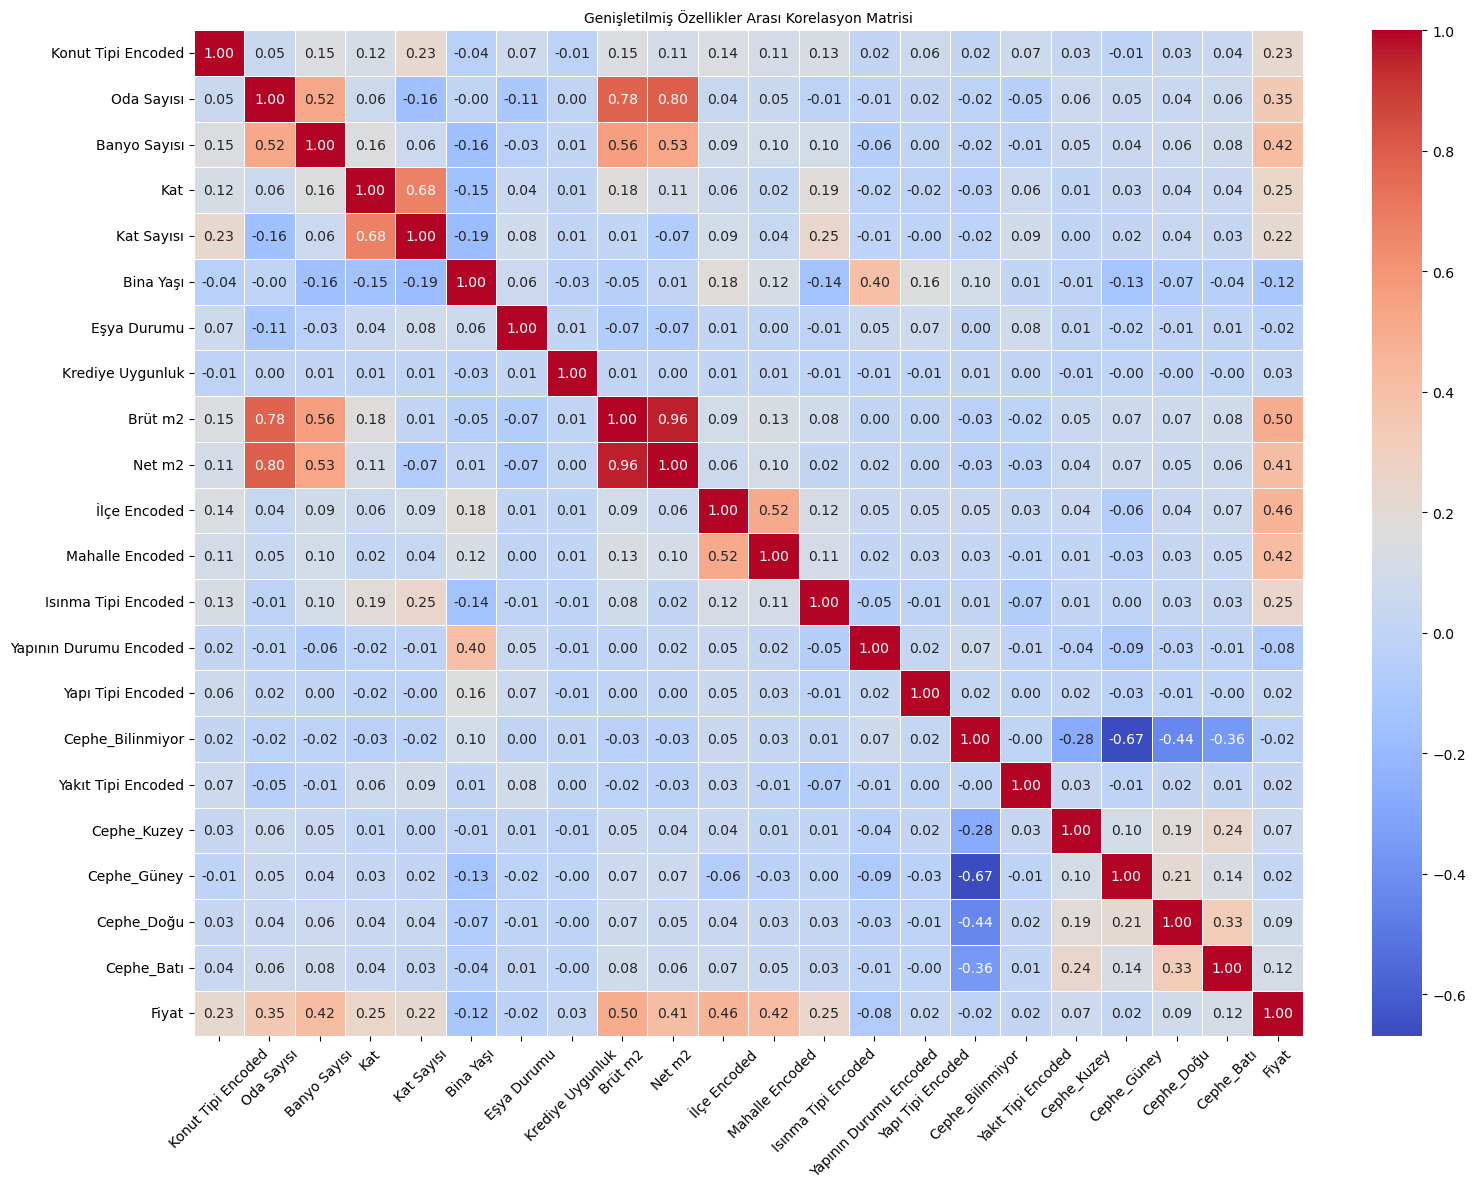

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon hesaplanabilir sayısal sütunları listele
selected_features = [
    'Konut Tipi Encoded', 'Oda Sayısı', 'Banyo Sayısı', 'Kat', 'Kat Sayısı',
    'Bina Yaşı', 'Eşya Durumu', 'Krediye Uygunluk', 'Brüt m2', 'Net m2',
    'İlçe Encoded', 'Mahalle Encoded',
    'Isınma Tipi Encoded', 'Yapının Durumu Encoded', 'Yapı Tipi Encoded',
    'Cephe_Bilinmiyor', 'Yakıt Tipi Encoded','Cephe_Kuzey', 'Cephe_Güney', 'Cephe_Doğu', 'Cephe_Batı','Fiyat'  # encoding yapılmış halleri
]

# Korelasyon matrisi
correlation_matrix = df[selected_features].corr()

# Görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Genişletilmiş Özellikler Arası Korelasyon Matrisi", fontsize=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('satılıkpreprocessing.csv', index=False, encoding='utf-8')